In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Blue Jays players

blue_jays_data = master_data.loc[master_data["Franchise"] == "Blue Jays"]

#Only showing players that signed with the Blue Jays

signed_blue_jays_data = blue_jays_data.loc[blue_jays_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_blue_jays_data.groupby("Year")

#Unsigned Blue Jays draft picks

unsigned_blue_jays_data = blue_jays_data.loc[blue_jays_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1997    51.7
1978    47.8
1989    38.2
1982    37.3
1995    35.8
2011    35.2
1999    31.6
2009    29.3
2010    29.1
2003    29.0
1991    27.6
1986    24.5
1977    23.9
1992    17.5
2012    16.6
1987    16.6
2013    15.0
1988    12.2
2004    12.0
2002    11.8
1996    11.4
1998    10.7
1993     9.6
2007     9.1
2005     8.7
2000     6.0
1994     5.9
2001     5.8
1983     4.5
2016     4.4
2006     3.0
1990     3.0
2008     2.8
1984     0.8
1981     0.8
1985     0.7
2014     0.7
2017     0.0
1980     0.0
2018     0.0
2019     0.0
2015    -0.2
1979    -0.8
Name: Total_WAR, dtype: float64

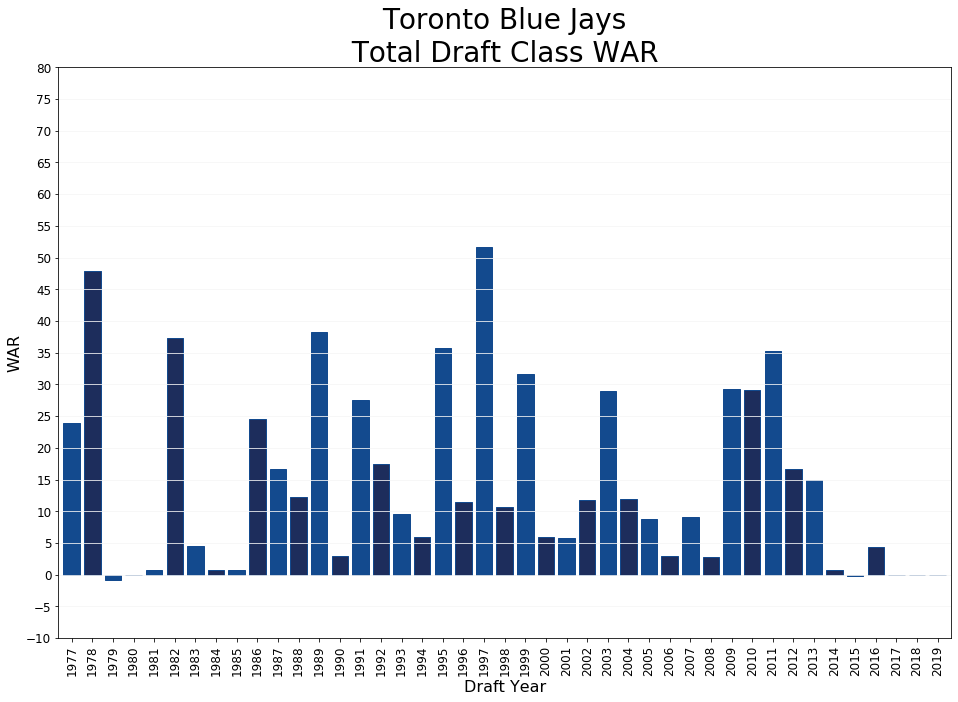

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#134A8E", "#1D2D5C"], width = .8, fontsize = 12, edgecolor = "#134A8E", figsize = (16, 10.5))
plt.title("Toronto Blue Jays\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Blue Jays WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_blue_jays_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
10809,1978,5,106,Blue Jays,Blue Jays,Y,Dave Stieb,1979.0,stiebda01,1012532.0,0.0,28.9,28.9,OF,4Yr,Southern Illinois University Carbondale,Carbondale,IL,More than 25 WAR
10161,1977,9,233,Blue Jays,Blue Jays,Y,Jesse Barfield,1981.0,barfije01,1000537.0,26.1,0.0,26.1,OF,HS,Central HS,Joliet,IL,More than 25 WAR
30385,1995,1,17,Blue Jays,Blue Jays,Y,Roy Halladay,1998.0,hallaro01,1303.0,-0.3,21.2,20.9,RHP,HS,Arvada West HS,Arvada,CO,20-25 WAR
21032,1989,3,79,Blue Jays,Blue Jays,Y,John Olerud,1989.0,olerujo01,1093.0,20.5,0.0,20.5,1B,4Yr,Washington State University,Pullman,WA,20-25 WAR
53212,2010,1,38,Blue Jays,Blue Jays,Y,Noah Syndergaard,2015.0,syndeno01,11762.0,1.5,18.8,20.3,RHP,HS,Legacy HS,Mansfield,TX,20-25 WAR
36841,1999,1,19,Blue Jays,Blue Jays,Y,Alex Rios,2004.0,riosal01,2090.0,20.2,0.0,20.2,3B,HS,San Pedro Martin HS,Guaynabo,PR,20-25 WAR
14093,1982,3,56,Blue Jays,Blue Jays,Y,Jimmy Key,1984.0,keyji01,1006885.0,0.0,20.0,20.0,LHP,4Yr,Clemson University,Clemson,SC,20-25 WAR
10705,1978,1,2,Blue Jays,Blue Jays,Y,Lloyd Moseby,1980.0,mosebll01,1009238.0,18.9,0.0,18.9,1B,HS,Oakland HS,Oakland,CA,15-20 WAR
17499,1986,5,133,Blue Jays,Blue Jays,Y,Pat Hentgen,1991.0,hentgpa01,145.0,-0.1,17.7,17.6,RHP,HS,Fraser HS,Fraser,MI,15-20 WAR
21476,1989,20,523,Blue Jays,Blue Jays,Y,Jeff Kent,1992.0,kentje01,1119.0,17.6,0.0,17.6,SS,4Yr,University of California Berkeley,Berkeley,CA,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_blue_jays_data.loc[((signed_blue_jays_data["WAR Group"] == "Less than 5 WAR") |
(signed_blue_jays_data["WAR Group"] == "No Major League Experience")) & 
(signed_blue_jays_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
9953,1977,1,25,Blue Jays,Blue Jays,Y,Tom Goffena,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Sidney HS,Sidney,OH,No Major League Experience
11485,1979,1,3,Blue Jays,Blue Jays,Y,Jay Schroeder,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Palisades HS,Pacific Palisades,CA,No Major League Experience
12354,1980,1,2,Blue Jays,Blue Jays,Y,Garry Harris,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Herbert Hoover HS,San Diego,CA,No Major League Experience
13189,1981,1,5,Blue Jays,Blue Jays,Y,Matt Williams,1983.0,willima03,1014021.0,0.0,-0.2,-0.2,RHP,4Yr,Rice University,Houston,TX,Less than 5 WAR
13205,1981,1,21,Blue Jays,Blue Jays,Y,John Cerutti,1985.0,cerutjo01,1002106.0,0.0,2.5,2.5,LHP,4Yr,Amherst College,Amherst,MA,Less than 5 WAR
14039,1982,1,2,Blue Jays,Blue Jays,Y,Augie Schmidt,NaN,NaN,NaN,NaN,NaN,NaN,SS,4Yr,University of New Orleans,New Orleans,LA,No Major League Experience
14877,1983,1,9,Blue Jays,Blue Jays,Y,Matt Stark,1987.0,starkma01,1012429.0,-0.4,0.0,-0.4,C,HS,Los Altos HS,Hacienda Heights,CA,Less than 5 WAR
16559,1985,1,25,Blue Jays,Blue Jays,Y,Greg David,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Barron Collier HS,Naples,FL,No Major League Experience
17392,1986,1,26,Blue Jays,Blue Jays,Y,Earl Sanders,NaN,NaN,NaN,NaN,NaN,NaN,RHP,4Yr,Jackson State University,Jackson,MS,No Major League Experience
18274,1987,1,17,Blue Jays,Blue Jays,Y,Alex Sanchez,1989.0,sanchal02,1011405.0,0.0,-0.2,-0.2,RHP,4Yr,University of California Los Angeles,Los Angeles,CA,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_blue_jays_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
53721,2010,18,546,Blue Jays,Blue Jays,N,Kris Bryant,2015.0,bryankr01,15429.0,27.8,0.0,27.8,3B,HS,Bonanza HS,Las Vegas,NV,More than 25 WAR
17360,1985,36,826,Blue Jays,Blue Jays,N,Jim Abbott,1989.0,abbotji01,1000012.0,0.0,22.4,22.4,LHP,HS,Central HS,Flint,MI,20-25 WAR
20660,1988,44,1140,Blue Jays,Blue Jays,N,Scott Erickson,1990.0,ericksc01,137.0,0.0,18.4,18.4,RHP,JC,San Jose City College,San Jose,CA,15-20 WAR
51690,2009,1,37,Blue Jays,Blue Jays,N,James Paxton,2013.0,paxtoja01,11828.0,-0.1,17.1,17.0,LHP,4Yr,University of Kentucky,Lexington,KY,15-20 WAR
55378,2011,22,679,Blue Jays,Blue Jays,N,Aaron Nola,2015.0,nolaaa01,16149.0,-0.7,17.2,16.5,RHP,HS,Catholic HS,Baton Rouge,LA,15-20 WAR
33001,1996,33,969,Blue Jays,Blue Jays,N,Orlando Hudson,2002.0,hudsoor01,1307.0,14.1,0.0,14.1,SS,HS,Darlington HS,Darlington,SC,10-15 WAR
14708,1982,27,672,Blue Jays,Blue Jays,N,Mike Henneman,1987.0,hennemi01,1005656.0,0.0,9.2,9.2,RHP,JC,Jefferson College,Hillsboro,MO,5-10 WAR
30724,1995,13,356,Blue Jays,Blue Jays,N,Ted Lilly,1999.0,lillyte01,833.0,-0.2,8.6,8.4,LHP,JC,Fresno City College,Fresno,CA,5-10 WAR
25874,1992,12,345,Blue Jays,Blue Jays,N,Doug Mientkiewicz,1998.0,mientdo01,741.0,6.1,0.0,6.1,C,HS,Westminster Christian,Miami,FL,5-10 WAR
26798,1992,45,1269,Blue Jays,Blue Jays,N,Jeff DaVanon,1999.0,davanje02,1440.0,5.8,0.0,5.8,2B,HS,Bellaire HS,Bellaire,TX,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_blue_jays_data.loc[signed_blue_jays_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
21476,1989,20,523,Blue Jays,Blue Jays,Y,Jeff Kent,1992.0,kentje01,1119.0,17.6,0.0,17.6,SS,4Yr,University of California Berkeley,Berkeley,CA,15-20 WAR
35050,1997,43,1280,Blue Jays,Blue Jays,Y,Orlando Hudson,2002.0,hudsoor01,1307.0,14.1,0.0,14.1,SS,JC,Spartanburg Methodist College,Spartanburg,SC,10-15 WAR
55678,2011,32,979,Blue Jays,Blue Jays,Y,Kevin Pillar,2013.0,pillake01,12434.0,11.8,0.0,11.8,CF,4Yr,California State University Dominguez Hills,Carson,CA,10-15 WAR
34369,1997,20,599,Blue Jays,Blue Jays,Y,Mark Hendrickson,2002.0,hendrma01,1574.0,0.1,11.0,11.1,LHP,NaN,NaN,NaN,NaN,10-15 WAR
37345,1999,17,523,Blue Jays,Blue Jays,Y,Reed Johnson,2003.0,johnsre02,1702.0,8.1,0.0,8.1,OF,4Yr,California State University Fullerton,Fullerton,CA,5-10 WAR
20252,1988,28,732,Blue Jays,Blue Jays,Y,Woody Williams,1993.0,williwo02,1190.0,0.2,6.0,6.2,RHP,4Yr,University of Houston,Houston,TX,5-10 WAR
24284,1991,13,354,Blue Jays,Blue Jays,Y,Alex Gonzalez,1994.0,gonzaal01,281.0,5.9,0.0,5.9,SS,HS,Killian HS,Miami,FL,5-10 WAR
43245,2003,18,530,Blue Jays,Blue Jays,Y,Ryan Roberts,2006.0,roberry01,5653.0,5.8,0.0,5.8,3B,4Yr,University of Texas at Arlington,Arlington,TX,5-10 WAR
52113,2009,15,460,Blue Jays,Blue Jays,Y,Drew Hutchison,2012.0,hutchdr01,10732.0,0.1,3.9,4.0,RHP,HS,Lakeland Senior HS,Lakeland,FL,Less than 5 WAR
35788,1998,14,411,Blue Jays,Blue Jays,Y,Jay Gibbons,2001.0,gibboja01,141.0,4.0,0.0,4.0,1B,4Yr,California State University Los Angeles,Los Angeles,CA,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(blue_jays_data["Year"], blue_jays_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1977,43.8,56.2,0.0
1978,29.2,66.7,4.2
1979,50.0,45.0,5.0
1980,62.5,33.3,4.2
1981,70.8,29.2,0.0
1982,64.5,29.0,6.5
1983,56.5,43.5,0.0
1984,48.3,44.8,6.9
1985,56.8,32.4,10.8


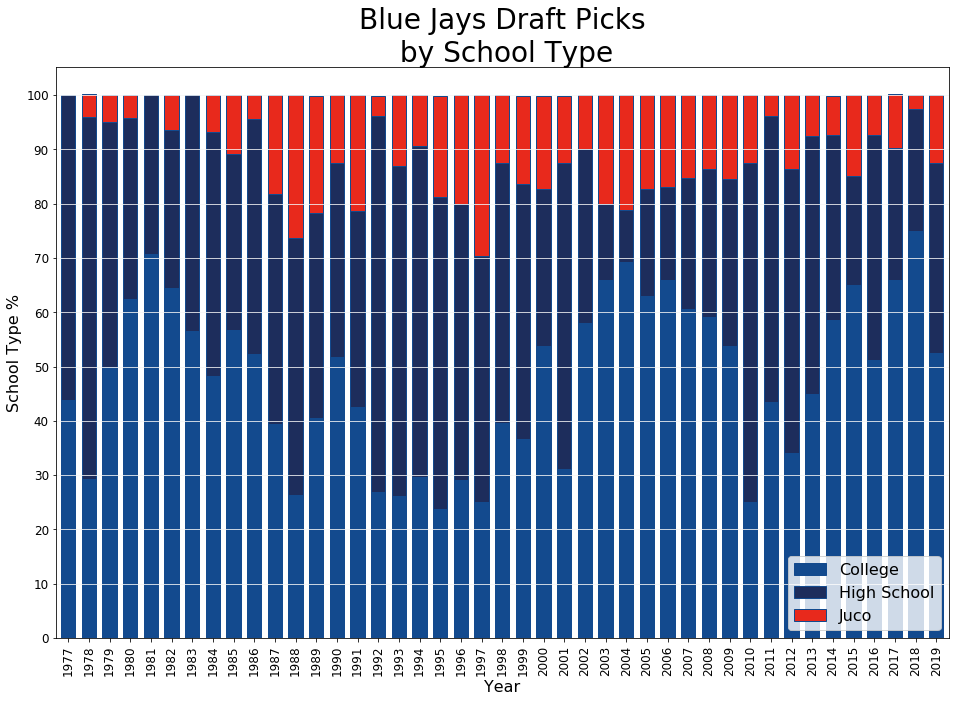

In [14]:
#Bar chart of table above

colors = ["#134A8E", "#1D2D5C", "#E8291C"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#134A8E", stacked = True, figsize = (16, 10.5))
plt.title("Blue Jays Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Blue Jays Draft Picks by School Type.png")
plt.show()